*BREAST CANCER SURVIVAL PREDICTION USING GENE EXPRESSION DATA*

Group: GroupBioeuuu


In [2]:
import pandas as pd 
import numpy as np 
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

#import
file_path = r"C:\Users\benlc\Desktop\utm_year3\progBio\project\Main\METABRIC.csv"

data = pd.read_csv(file_path)

data

C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\317367912.py:9: DtypeWarning: Columns (677,687,689,691) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1900,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1901,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1902,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


Pre-processing code below

In [3]:
print("Dataset Overview:")
print(data.head())
print("\nSummary Statistics:")
print(data.info())

#handle missing values
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include=["object"]).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

print("\nMissing Values After Handling:")
print(data.isnull().sum())

#z-score
threshold = 10 
z_scores = data[num_cols].apply(zscore)

data = data[(z_scores.abs() < threshold).all(axis=1)]
print(f"Shape after Z-score filtering: {data.shape}")


output_path = r"C:\Users\benlc\Desktop\utm_year3\progBio\project\Main\METABRIC_pre-processed.csv"
data.to_csv(output_path, index=False)
print(f"\nCleaned and normalized dataset saved to {output_path}")

Dataset Overview:
   age_at_diagnosis type_of_breast_surgery    cancer_type  \
0             75.65             MASTECTOMY  Breast Cancer   
1             43.19      BREAST CONSERVING  Breast Cancer   
2             48.87             MASTECTOMY  Breast Cancer   
3             47.68             MASTECTOMY  Breast Cancer   
4             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc er_status  \
0                 claudin-low       1                   Positve  Positive   
1               

Read processed file

In [4]:
data_processed = pd.read_csv(output_path)
data_processed

C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\961951958.py:1: DtypeWarning: Columns (687,689,691) have mixed types. Specify dtype option on import or set low_memory=False.
  data_processed = pd.read_csv(output_path)


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
4,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,59.20,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1831,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1832,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1833,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


Feature Selection

In [5]:
#to distinguish features and lables
X = data_processed.drop("overall_survival", axis=1)
y = data_processed["overall_survival"]

Differential Expression Analysis 
1) T-Test for Binary Classification

In [6]:
from scipy.stats import ttest_ind 

numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns
X_numeric = X[numeric_cols]

#group data by target classes
group1 = X_numeric[y == 0]
group2 = X_numeric[y == 1]

#t-test for each feature
t_test_results = {}
for col in X_numeric.columns:
    t_stat, p_value = ttest_ind(group1[col], group2[col], nan_policy='omit')
    t_test_results[col] = p_value

#select features with significant p-values
significant_features = [col for col, p in t_test_results.items() if p < 0.05]

#feature set IMPROTANT! 
X_ttest = X[significant_features]

print(f"Selected features after t-test: {len(significant_features)}")




Selected features after t-test: 261


In [7]:
significant_features_df = pd.DataFrame(significant_features, columns=["Feature Name"])

from IPython.display import display
display(significant_features_df)


X_ttest.to_csv("t_test.csv", index=False)
t_test_results = pd.read_csv("t_test.csv")
display(t_test_results)

,Feature Name
0,age_at_diagnosis
1,chemotherapy
2,cohort
3,neoplasm_histologic_grade
4,lymph_nodes_examined_positive
...,...
256,sdc4
257,spry2
258,tnk2
259,tulp4


,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,tumor_size,...,nrip1,pik3r3,prkd1,ran,rdh5,sdc4,spry2,tnk2,tulp4,ugt2b15
0,75.65,0,1,3.0,10,5.0,6.044,140.500000,1,22.0,...,0.4076,-0.6199,1.8407,0.6630,5.0109,0.5008,2.8796,-1.1741,-1.4779,-0.5954
1,43.19,0,1,3.0,0,2.0,4.020,84.633333,1,10.0,...,-0.1878,-1.0623,0.3500,-0.2505,-0.6337,-0.1047,0.2446,0.9121,-0.9538,-0.2264
2,48.87,1,1,2.0,1,2.0,4.030,163.700000,0,15.0,...,-0.2882,-0.1727,0.8306,0.2707,-0.7554,-0.3559,0.4593,-3.7172,-1.5538,1.3701
3,47.68,1,1,2.0,3,1.0,4.050,164.933333,1,25.0,...,-0.2049,-0.3290,2.4162,1.7962,-1.2505,-0.1742,1.3361,-2.3286,-0.9924,-0.3154
4,78.77,0,1,3.0,0,4.0,4.062,7.800000,1,31.0,...,-0.1657,1.0143,1.3506,0.2875,-1.0378,1.1967,-0.4448,-0.5092,-0.3021,0.9357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,59.20,0,4,2.0,1,2.0,4.030,82.733333,0,15.0,...,1.3102,1.1877,-1.8356,1.3557,-0.0855,0.1103,-0.7836,-1.4772,-1.4477,-0.1200
1831,43.10,0,4,3.0,1,4.0,5.050,196.866667,1,25.0,...,0.5042,-0.4743,1.5353,1.4046,-0.6478,-1.9203,0.6390,-1.2644,-0.3566,-0.2615
1832,42.88,0,4,3.0,1,6.0,5.040,44.733333,1,20.0,...,-0.0524,-0.5184,-0.0859,0.8469,-0.6278,0.0244,-0.9980,-0.3412,-1.0703,-0.6950
1833,61.16,0,4,2.0,12,15.0,5.050,86.233333,0,25.0,...,0.4492,-0.5593,-0.8244,1.3851,-0.8536,-0.8603,-0.7043,-0.6985,-0.6046,-0.4915


Recursive Feature Elimination (RFE)

In [8]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ttest, y, test_size=0.30, random_state=42)

#perform RFE with SVM
svc = SVC(kernel="linear")  #can use RBF also
rfe_svm = RFE(estimator=svc, n_features_to_select=10) 
rfe_svm.fit(X_train, y_train)

#get selected features from SVM-RFE
selected_features_svm = X_ttest.columns[rfe_svm.support_]
print(f"Features selected by RFE (SVM): {selected_features_svm}")

#perform RFE with Random Forest
rf = RandomForestClassifier(random_state=42)
rfe_rf = RFE(estimator=rf, n_features_to_select=10)
rfe_rf.fit(X_train, y_train)

#get selected features from RF-RFE
selected_features_rf = X_ttest.columns[rfe_rf.support_]
print(f"Features selected by RFE (Random Forest): {selected_features_rf}")

Features selected by RFE (SVM): Index(['radio_therapy', 'chek2', 'epcam', 'eif4e', 'itgav', 'kit', 'mmp10',
       'arid1a', 'fancd2', 'hsd17b11'],
      dtype='object')
Features selected by RFE (Random Forest): Index(['age_at_diagnosis', 'nottingham_prognostic_index',
       'overall_survival_months', 'jak1', 'notch3', 'map4', 'lama2', 'ar',
       'cdkn2c', 'hsd17b11'],
      dtype='object')


Prepare Data for  Model Training
- Loading Config

In [9]:
import yaml
import os

# Load the config.yaml file
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

# Accessing parameters from config
model_config = config.get("model", {})
model_directory = config.get("paths", {}).get("model_directory", "./models/")

# Ensure the model directory exists
os.makedirs(model_directory, exist_ok=True)

# Example usage of config parameters
print(f"Model Type: {model_config.get('type')}")
print(f"Kernel: {model_config.get('kernel')}")
print(f"Model Directory: {model_directory}")



Model Type: None
Kernel: None
Model Directory: ./models/


1. Initialize Support Vector Classifier

In [10]:
import joblib
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ttest, y, test_size=0.3, random_state=42) #for all the data

def train_svc(X_train, y_train, X_test, y_test, config, model_directory):
    model_config = config["models"]["model_1"]  #update key to access SVC model
    model_name = model_config["name"]
    param_grid = model_config["param_grid"]
    filename = model_config["filename"]

    #initialize and train SVC using GridSearchCV
    model = SVC(probability=True, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    #get the best model and save it
    best_model = grid_search.best_estimator_
    model_path = os.path.join(model_directory, filename)
    joblib.dump(best_model, model_path)

    #evaluate the model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} trained and saved to {model_path}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy on test set: {accuracy:.4f}")
    
    return best_model, accuracy, model_path



2) Initialize Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def train_rfc(X_train, y_train, X_test, y_test, config, model_directory):
    model_config = config["models"]["model_2"]  #update key to access RFC model
    model_name = model_config["name"]
    param_grid = model_config["param_grid"]
    filename = model_config["filename"]

    #initialize and train RFC using GridSearchCV
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    #get the best model and save it
    best_model = grid_search.best_estimator_
    model_path = os.path.join(model_directory, filename)
    joblib.dump(best_model, model_path)

    #evaluate the model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} trained and saved to {model_path}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy on test set: {accuracy:.4f}")
    
    return best_model, accuracy, model_path

MODEL BUILDING

In [12]:
# Subset data for SVC with SVM-RFE features
X_train_svc_svm = X_train[selected_features_svm]
X_test_svc_svm = X_test[selected_features_svm]

# Subset data for SVC with RF-RFE features
X_train_svc_rf = X_train[selected_features_rf]
X_test_svc_rf = X_test[selected_features_rf]

# Subset data for RFC with SVM-RFE features
X_train_rfc_svm = X_train[selected_features_svm]
X_test_rfc_svm = X_test[selected_features_svm]

# Subset data for RFC with RF-RFE features
X_train_rfc_rf = X_train[selected_features_rf]
X_test_rfc_rf = X_test[selected_features_rf]


Support Vector Classifier (SVC)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

#initialize SVC model
svm_model = SVC(random_state=42, probability=True)

#train and evaluate SVC with selected features (SVM-RFE)
svm_model.fit(X_train_svc_svm, y_train)
y_pred_svm = svm_model.predict(X_test_svc_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVC model one-time accuracy (with SVM-RFE features): {accuracy_svm:.4f}")

#train and evaluate SVC with selected features (RF-RFE)
svm_model.fit(X_train_svc_rf, y_train)
y_pred_rf = svm_model.predict(X_test_svc_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"SVC model one-time accuracy (with RF-RFE features): {accuracy_rf:.4f}")

#set up Repeated Stratified K-Fold (10 folds, repeated 10 times)
repeated_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)


#perform repeated cross-validation for SVC with SVM-RFE features
cv_scores_svm = cross_val_score(svm_model, X_ttest[selected_features_svm], y, cv=repeated_cv, scoring='accuracy')
print("\nSVC Repeated Cross-Validation Results (SVM-RFE):")
print(f"Repeated Cross-Validation Accuracy Scores (SVM-RFE): {cv_scores_svm}")
print(f"Average Accuracy (SVM-RFE): {np.mean(cv_scores_svm):.4f}")
print(f"Standard Deviation (SVM-RFE): {np.std(cv_scores_svm):.4f}")


#perform repeated cross-validation for SVC with RF-RFE features
cv_scores_rf = cross_val_score(svm_model, X_ttest[selected_features_rf], y, cv=repeated_cv, scoring='accuracy')
print("\nSVC Repeated Cross-Validation Results (RF-RFE):")
print(f"Repeated Cross-Validation Accuracy Scores (RF-RFE): {cv_scores_rf}")
print(f"Average Accuracy (RF-RFE): {np.mean(cv_scores_rf):.4f}")
print(f"Standard Deviation (RF-RFE): {np.std(cv_scores_rf):.4f}")


SVC model one-time accuracy (with SVM-RFE features): 0.6243
SVC model one-time accuracy (with RF-RFE features): 0.7387

SVC Repeated Cross-Validation Results (SVM-RFE):
Repeated Cross-Validation Accuracy Scores (SVM-RFE): [0.66304348 0.61956522 0.625      0.66304348 0.64673913 0.6284153
 0.60655738 0.63387978 0.6284153  0.64480874 0.65217391 0.6576087
 0.64673913 0.5923913  0.61956522 0.58469945 0.66120219 0.61202186
 0.6557377  0.66666667 0.61956522 0.6576087  0.66304348 0.625
 0.64130435 0.61748634 0.61202186 0.67759563 0.6010929  0.62295082
 0.61956522 0.63043478 0.65217391 0.63586957 0.64130435 0.66666667
 0.63387978 0.61748634 0.56830601 0.6557377  0.64673913 0.55434783
 0.66304348 0.61413043 0.63586957 0.67759563 0.62295082 0.60655738
 0.66120219 0.67213115 0.66847826 0.61956522 0.59782609 0.64673913
 0.60869565 0.6557377  0.69945355 0.61202186 0.67213115 0.60655738
 0.5923913  0.66304348 0.63586957 0.61413043 0.5923913  0.63934426
 0.6284153  0.61748634 0.68852459 0.63934426 0.6

Random Forest Classifier (RFC)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

#initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)


#train and evaluate Random Forest with selected features (SVM-RFE)
rf_model.fit(X_train_rfc_svm, y_train)
y_pred_svm = rf_model.predict(X_test_rfc_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Random Forest model one-time accuracy (with SVM-RFE features): {accuracy_svm:.4f}")

#train and evaluate Random Forest with selected features (RF-RFE)
rf_model.fit(X_train_rfc_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rfc_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest model one-time accuracy (with RF-RFE features): {accuracy_rf:.4f}")


#set up Repeated Stratified K-Fold (10 folds, repeated 10 times)
repeated_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

#perform repeated cross-validation for Random Forest with SVM-RFE features
cv_scores_svm = cross_val_score(rf_model, X_ttest[selected_features_svm], y, cv=repeated_cv, scoring='accuracy')
print("\nRandom Forest Repeated Cross-Validation Results (SVM-RFE):")
print(f"Repeated Cross-Validation Accuracy Scores (SVM-RFE): {cv_scores_svm}")
print(f"Average Accuracy (SVM-RFE): {np.mean(cv_scores_svm):.4f}")
print(f"Standard Deviation (SVM-RFE): {np.std(cv_scores_svm):.4f}")

#perform repeated cross-validation for Random Forest with RF-RFE features
cv_scores_rf = cross_val_score(rf_model, X_ttest[selected_features_rf], y, cv=repeated_cv, scoring='accuracy')
print("\nRandom Forest Repeated Cross-Validation Results (RF-RFE):")
print(f"Repeated Cross-Validation Accuracy Scores (RF-RFE): {cv_scores_rf}")
print(f"Average Accuracy (RF-RFE): {np.mean(cv_scores_rf):.4f}")
print(f"Standard Deviation (RF-RFE): {np.std(cv_scores_rf):.4f}")




Random Forest model one-time accuracy (with SVM-RFE features): 0.6316
Random Forest model one-time accuracy (with RF-RFE features): 0.7477

Random Forest Repeated Cross-Validation Results (SVM-RFE):
Repeated Cross-Validation Accuracy Scores (SVM-RFE): [0.68478261 0.63043478 0.60326087 0.6576087  0.58695652 0.6284153
 0.61202186 0.62295082 0.62295082 0.63387978 0.63043478 0.63043478
 0.63043478 0.64673913 0.65217391 0.59562842 0.67213115 0.60655738
 0.67213115 0.64480874 0.67934783 0.65217391 0.59782609 0.61413043
 0.63043478 0.61202186 0.66120219 0.65027322 0.61748634 0.61748634
 0.64673913 0.64673913 0.67934783 0.60869565 0.625      0.63387978
 0.63387978 0.61202186 0.58469945 0.61748634 0.63586957 0.57608696
 0.67391304 0.63586957 0.64130435 0.64480874 0.64480874 0.56284153
 0.67213115 0.6010929  0.65217391 0.625      0.61956522 0.68478261
 0.61956522 0.61202186 0.64480874 0.61202186 0.66120219 0.6557377
 0.57608696 0.60869565 0.57608696 0.58695652 0.56521739 0.64480874
 0.64480874 0

<>:150: SyntaxWarning: invalid escape sequence '\ '
<>:154: SyntaxWarning: invalid escape sequence '\m'
<>:169: SyntaxWarning: invalid escape sequence '\ '
<>:185: SyntaxWarning: invalid escape sequence '\m'
<>:150: SyntaxWarning: invalid escape sequence '\ '
<>:154: SyntaxWarning: invalid escape sequence '\m'
<>:169: SyntaxWarning: invalid escape sequence '\ '
<>:185: SyntaxWarning: invalid escape sequence '\m'
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2870114464.py:150: SyntaxWarning: invalid escape sequence '\ '
  ranked_features.to_csv('comparison\ ranked_features.csv', index=False)
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2870114464.py:154: SyntaxWarning: invalid escape sequence '\m'
  df_results.to_csv('comparison\model_comparison_results.csv', index=False)
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2870114464.py:169: SyntaxWarning: invalid escape sequence '\ '
  plt.savefig('comparison\ roc_curve_comparison.png')
C:\Users\benlc\AppData\Local\Temp\ipykerne

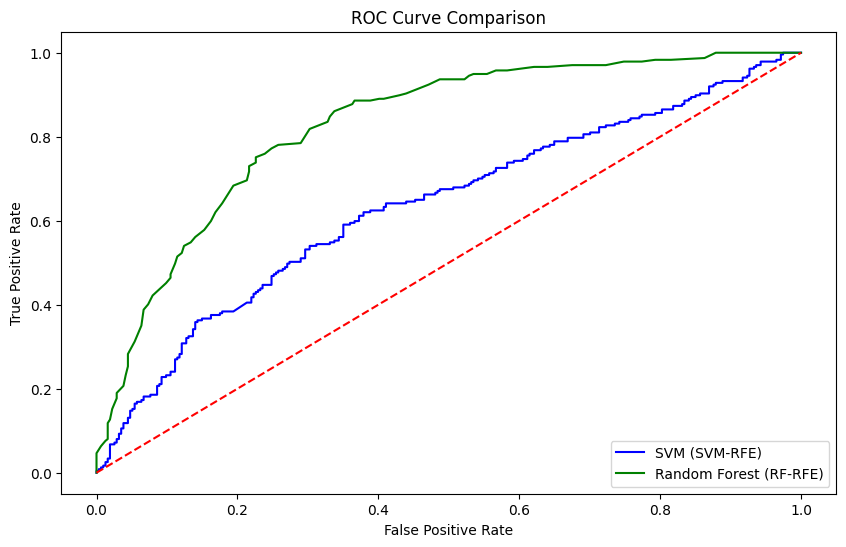

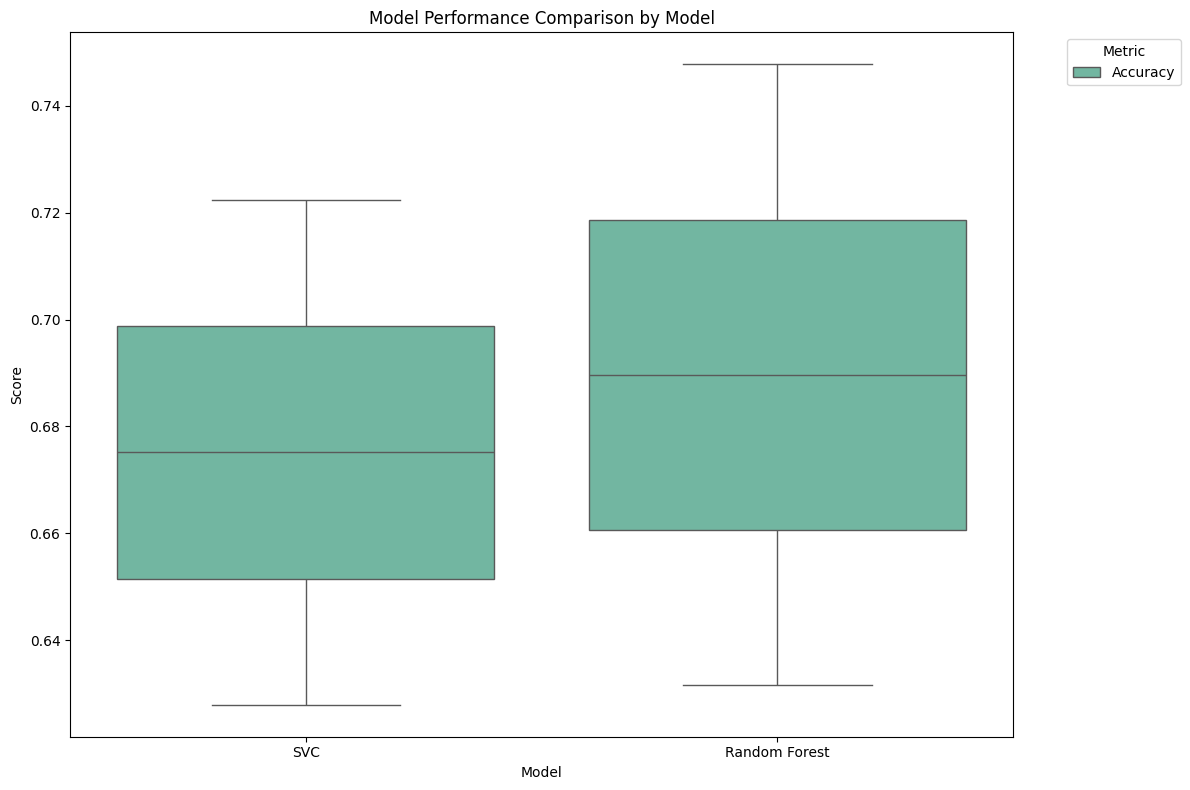

C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2870114464.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")


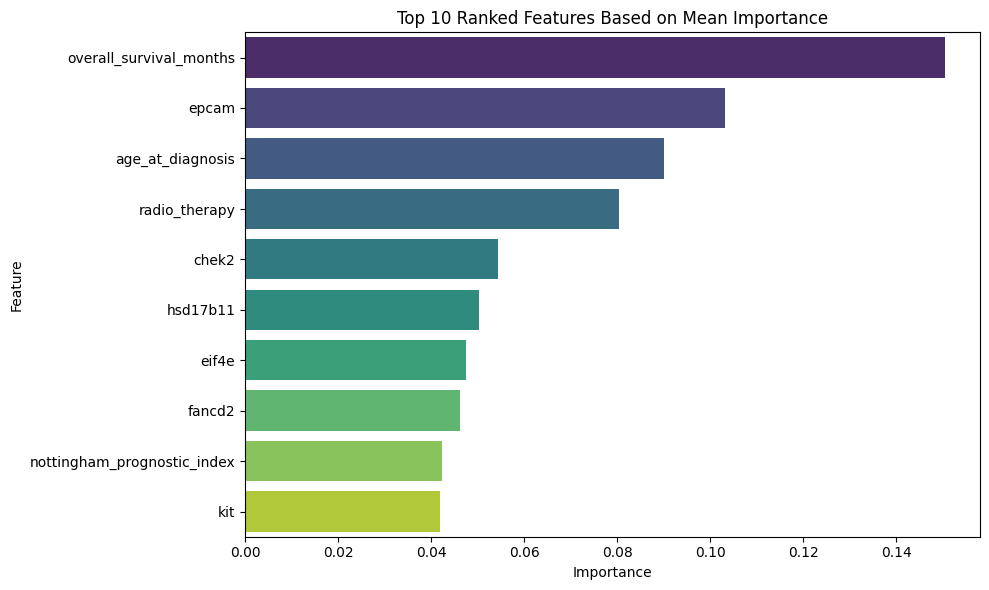

           Model Feature Set  Accuracy  Precision    Recall  F1 Score  \
0            SVC     SVM-RFE  0.627949   0.602564  0.396624  0.478372   
1            SVC      RF-RFE  0.722323   0.698113  0.624473  0.659243   
2  Random Forest     SVM-RFE  0.631579   0.601190  0.426160  0.498765   
3  Random Forest      RF-RFE  0.747731   0.711207  0.696203  0.703625   

        AUC                                       Top Features  
0  0.634497        hsd17b11, chek2, radio_therapy, fancd2, kit  
1  0.814037  overall_survival_months, age_at_diagnosis, not...  
2  0.643614                hsd17b11, arid1a, kit, epcam, mmp10  
3  0.827159  overall_survival_months, age_at_diagnosis, jak...  
                        Feature  Importance
0       overall_survival_months    0.150432
1                         epcam    0.103063
2              age_at_diagnosis    0.090077
3                 radio_therapy    0.080276
4                         chek2    0.054351
5                      hsd17b11    0.050216
6

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import seaborn as sns
import numpy as np

#initialize models
svm_model = SVC(kernel='linear', random_state=42, probability=True)
rf_model = RandomForestClassifier(random_state=42)

#initialize results dictionary to store metrics
results = {
    'Model': [],
    'Feature Set': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': [],
    'Top Features': [] 
}

#SVM with SVM-RFE features
svm_model.fit(X_train_svc_svm, y_train)
y_pred_svm = svm_model.predict(X_test_svc_svm)
y_prob_svm = svm_model.predict_proba(X_test_svc_svm)[:, 1]

results['Model'].append('SVC')
results['Feature Set'].append('SVM-RFE')
results['Accuracy'].append(accuracy_score(y_test, y_pred_svm))
results['Precision'].append(precision_score(y_test, y_pred_svm))
results['Recall'].append(recall_score(y_test, y_pred_svm))
results['F1 Score'].append(f1_score(y_test, y_pred_svm))
results['AUC'].append(roc_auc_score(y_test, y_prob_svm))

#extract top 5 features for SVM using permutation importance
perm_importance_svm = permutation_importance(svm_model, X_test_svc_svm, y_test, n_repeats=10, random_state=42)
svm_feature_importance = pd.DataFrame({
    'Feature': X_train_svc_svm.columns,
    'Importance': perm_importance_svm.importances_mean
})
top_svm_features = svm_feature_importance.sort_values(by='Importance', ascending=False).head(5)
results['Top Features'].append(', '.join(top_svm_features['Feature'].values))  # Save top features as a string

#SVM with RF-RFE features
svm_model.fit(X_train_svc_rf, y_train)
y_pred_rf = svm_model.predict(X_test_svc_rf)
y_prob_rf = svm_model.predict_proba(X_test_svc_rf)[:, 1]

results['Model'].append('SVC')
results['Feature Set'].append('RF-RFE')
results['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
results['Precision'].append(precision_score(y_test, y_pred_rf))
results['Recall'].append(recall_score(y_test, y_pred_rf))
results['F1 Score'].append(f1_score(y_test, y_pred_rf))
results['AUC'].append(roc_auc_score(y_test, y_prob_rf))

#extract top 5 features for SVM (RF-RFE)
perm_importance_rf = permutation_importance(svm_model, X_test_svc_rf, y_test, n_repeats=10, random_state=42)
svm_feature_importance_rf = pd.DataFrame({
    'Feature': X_train_svc_rf.columns,
    'Importance': perm_importance_rf.importances_mean
})
top_svm_features_rf = svm_feature_importance_rf.sort_values(by='Importance', ascending=False).head(5)
results['Top Features'].append(', '.join(top_svm_features_rf['Feature'].values))  # Save top features as a string

#random Forest with SVM-RFE features
rf_model.fit(X_train_rfc_svm, y_train)
y_pred_rfc_svm = rf_model.predict(X_test_rfc_svm)
y_prob_rfc_svm = rf_model.predict_proba(X_test_rfc_svm)[:, 1]

results['Model'].append('Random Forest')
results['Feature Set'].append('SVM-RFE')
results['Accuracy'].append(accuracy_score(y_test, y_pred_rfc_svm))
results['Precision'].append(precision_score(y_test, y_pred_rfc_svm))
results['Recall'].append(recall_score(y_test, y_pred_rfc_svm))
results['F1 Score'].append(f1_score(y_test, y_pred_rfc_svm))
results['AUC'].append(roc_auc_score(y_test, y_prob_rfc_svm))

#extract top 5 features for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X_train_rfc_svm.columns,
    'Importance': rf_model.feature_importances_
})
top_rf_features_svm = rf_feature_importance.sort_values(by='Importance', ascending=False).head(5)
results['Top Features'].append(', '.join(top_rf_features_svm['Feature'].values))  # Save top features as a string

#random Forest with RF-RFE features
rf_model.fit(X_train_rfc_rf, y_train)
y_pred_rfc_rf = rf_model.predict(X_test_rfc_rf)
y_prob_rfc_rf = rf_model.predict_proba(X_test_rfc_rf)[:, 1]

results['Model'].append('Random Forest')
results['Feature Set'].append('RF-RFE')
results['Accuracy'].append(accuracy_score(y_test, y_pred_rfc_rf))
results['Precision'].append(precision_score(y_test, y_pred_rfc_rf))
results['Recall'].append(recall_score(y_test, y_pred_rfc_rf))
results['F1 Score'].append(f1_score(y_test, y_pred_rfc_rf))
results['AUC'].append(roc_auc_score(y_test, y_prob_rfc_rf))

#extract top 5 features for Random Forest (RF-RFE)
rf_feature_importance = pd.DataFrame({
    'Feature': X_train_rfc_rf.columns,
    'Importance': rf_model.feature_importances_
})
top_rf_features_rf = rf_feature_importance.sort_values(by='Importance', ascending=False).head(5)
results['Top Features'].append(', '.join(top_rf_features_rf['Feature'].values))  # Save top features as a string

df_results = pd.DataFrame(results)

all_feature_importance = pd.DataFrame()


#adding SVM-RFE feature importances
svm_features_all = pd.DataFrame({
    'Feature': X_train_svc_svm.columns,
    'Importance': perm_importance_svm.importances_mean
})
svm_features_all['Model'] = 'SVM-RFE'

#adding RF-RFE feature importances
rf_features_all = pd.DataFrame({
    'Feature': X_train_svc_rf.columns,
    'Importance': perm_importance_rf.importances_mean
})
rf_features_all['Model'] = 'RF-RFE'

#adding Random Forest SVM-RFE and RF-RFE feature importances
rf_svm_features_all = pd.DataFrame({
    'Feature': X_train_rfc_svm.columns,
    'Importance': rf_model.feature_importances_
})
rf_svm_features_all['Model'] = 'Random Forest (SVM-RFE)'

rf_rf_features_all = pd.DataFrame({
    'Feature': X_train_rfc_rf.columns,
    'Importance': rf_model.feature_importances_
})
rf_rf_features_all['Model'] = 'Random Forest (RF-RFE)'

#combine all feature importances into one dataframe
all_feature_importance = pd.concat([svm_features_all, rf_features_all, rf_svm_features_all, rf_rf_features_all])

ranked_features = all_feature_importance.groupby('Feature').agg({'Importance': 'mean'}).sort_values(by='Importance', ascending=False).reset_index()

ranked_features.to_csv('comparison\ ranked_features.csv', index=False)

#save comparison
df_results = df_results.drop(columns=['radio_therapy', 'age_at_diagnosis', 'overall_survival_months'], errors='ignore')
df_results.to_csv('comparison\model_comparison_results.csv', index=False)

#ROC Curve
plt.figure(figsize=(10, 6))
from sklearn.metrics import roc_curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rfc_rf)

plt.plot(fpr_svm, tpr_svm, label='SVM (SVM-RFE)', color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (RF-RFE)', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.savefig('comparison\ roc_curve_comparison.png')
plt.show()


metrics = ['Accuracy']
df_boxplot_melted = df_results.melt(id_vars=['Model'], value_vars=metrics, 
                                    var_name='Metric', value_name='Score')


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_boxplot_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.title('Model Performance Comparison by Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('comparison\model_comparison_boxplot.png')
plt.show()

#bar plot
top_n = 10 
top_features = ranked_features.head(top_n)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
plt.title(f"Top {top_n} Ranked Features Based on Mean Importance")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print out the results
print(df_results)
print(ranked_features)


In [ ]:
import joblib

#save SVC model (SVM-RFE or RF-RFE)
joblib.dump(svm_model, 'models\svc_model_rf_rfe.pkl')
joblib.dump(svm_model, 'models\svc_model_svm_rfe.pkl')

#save RandomForest model (SVM-RFE or RF-RFE)
joblib.dump(rf_model, 'models\ rfc_model_rf_rfe.pkl')
joblib.dump(rf_model, 'models\ rfc_model_svm_rfe.pkl') 

print("Models saved")


Models saved


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2232046899.py:4: SyntaxWarning: invalid escape sequence '\s'
  joblib.dump(svm_model, 'models\svc_model_rf_rfe.pkl')
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2232046899.py:5: SyntaxWarning: invalid escape sequence '\s'
  joblib.dump(svm_model, 'models\svc_model_svm_rfe.pkl')
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2232046899.py:8: SyntaxWarning: invalid escape sequence '\ '
  joblib.dump(rf_model, 'models\ rfc_model_rf_rfe.pkl')
C:\Users\benlc\AppData\Local\Temp\ipykernel_57020\2232046899.py:9: SyntaxWarning: invalid escape s

: 